In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
covid = pd.read_csv('CovidDeathsLoc.csv', delimiter=';')
pd.to_datetime(covid['date']).head()
covid['date'] = pd.to_datetime(covid['date'])
covid.head()

,deaths_ID,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,1,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
covid.dtypes

deaths_ID                                      int64
iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
population                                   float64
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            f

<AxesSubplot:title={'center':'Global Covid-19 Daily Deaths - Jan 2020 to Jan 2022'}, xlabel='date', ylabel='Deaths by Day'>

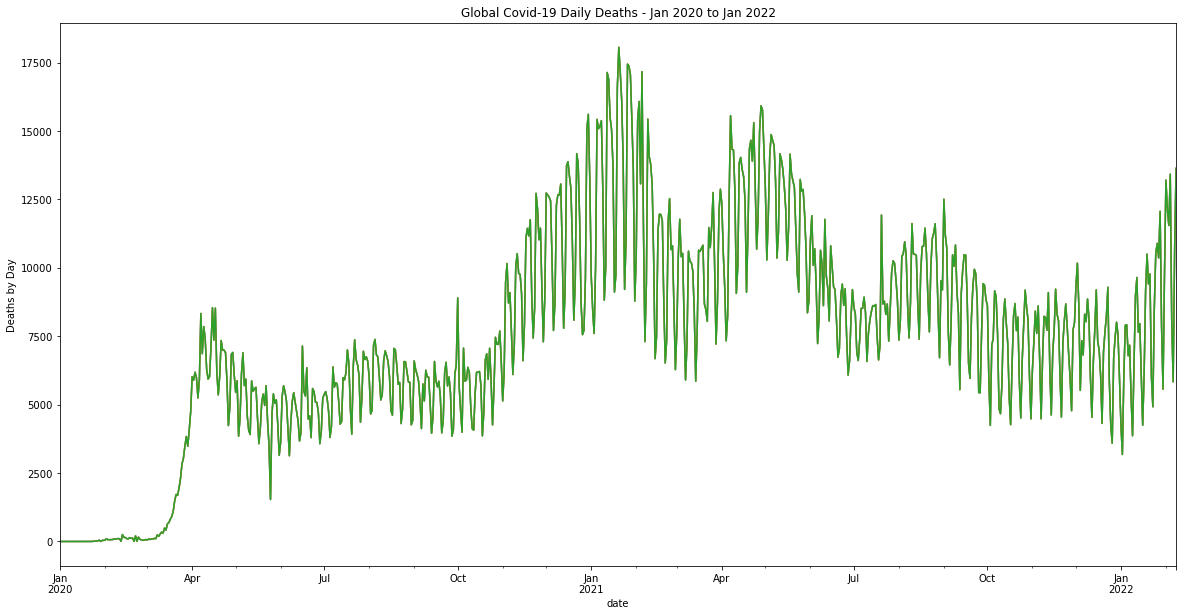

In [4]:
deaths = covid.groupby(['date'])['new_deaths'].sum() 
deaths.plot(figsize=(20,10))
deaths.plot(ylabel="Deaths by Day");
plt.title("Global Covid-19 Daily Deaths - Jan 2020 to Jan 2022")
deaths.plot.line()

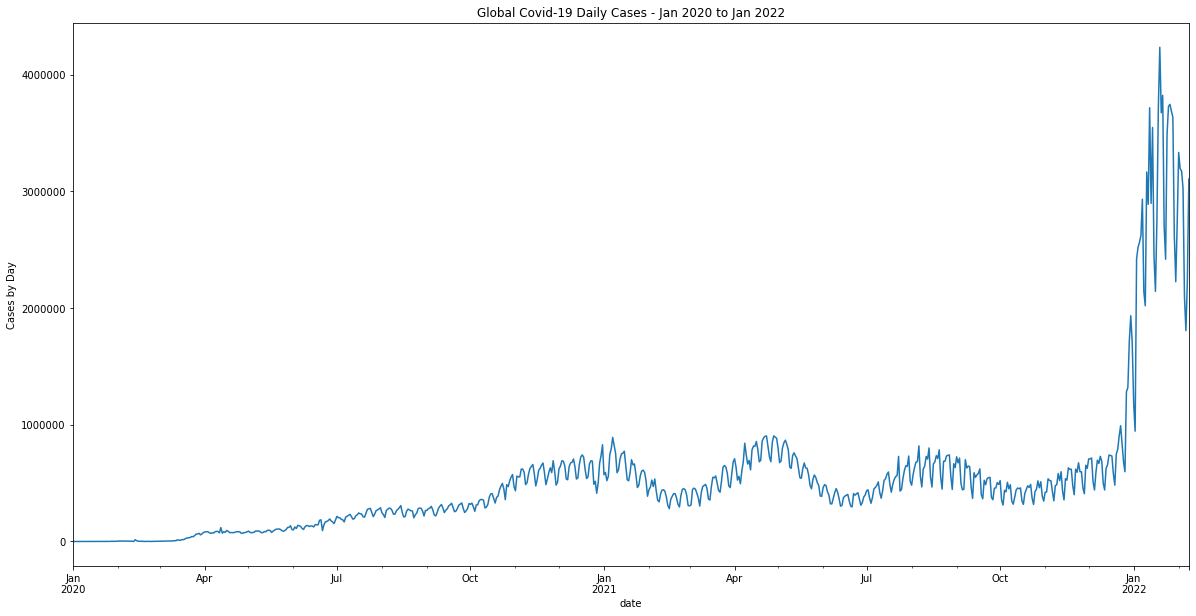

In [5]:
cases = covid.groupby(['date'])['new_cases'].sum()
plt.figure(figsize=(20, 10))
cases.plot()
plt.title("Global Covid-19 Daily Cases - Jan 2020 to Jan 2022")
plt.ylabel('Cases by Day')
plt.ticklabel_format(style='plain', axis='y') #Avoid scientific notation

In [6]:
covid['new_deaths'] = covid['new_deaths'].fillna(0)
covid['total_deaths'] = covid['total_deaths'].fillna(0)
deaths_rate = (covid['new_deaths']/covid['total_deaths'])*100
covid['deaths_rate']=deaths_rate
covid['deaths_rate'] = covid['deaths_rate'].fillna(0).abs()
covid[['date','new_deaths','total_deaths','deaths_rate']]

,date,new_deaths,total_deaths,deaths_rate
0,2020-02-24,0.0,0.0,0.000000
1,2020-02-25,0.0,0.0,0.000000
2,2020-02-26,0.0,0.0,0.000000
3,2020-02-27,0.0,0.0,0.000000
4,2020-02-28,0.0,0.0,0.000000
...,...,...,...,...
150835,2022-02-04,0.0,5357.0,0.000000
150836,2022-02-05,5.0,5362.0,0.093249
150837,2022-02-06,0.0,5362.0,0.000000
150838,2022-02-07,0.0,5362.0,0.000000


<AxesSubplot:title={'center':'Global Covid-19 Deaths Rate - Jan 2020 to Jan 2022'}, xlabel='date', ylabel='Deaths Rate'>

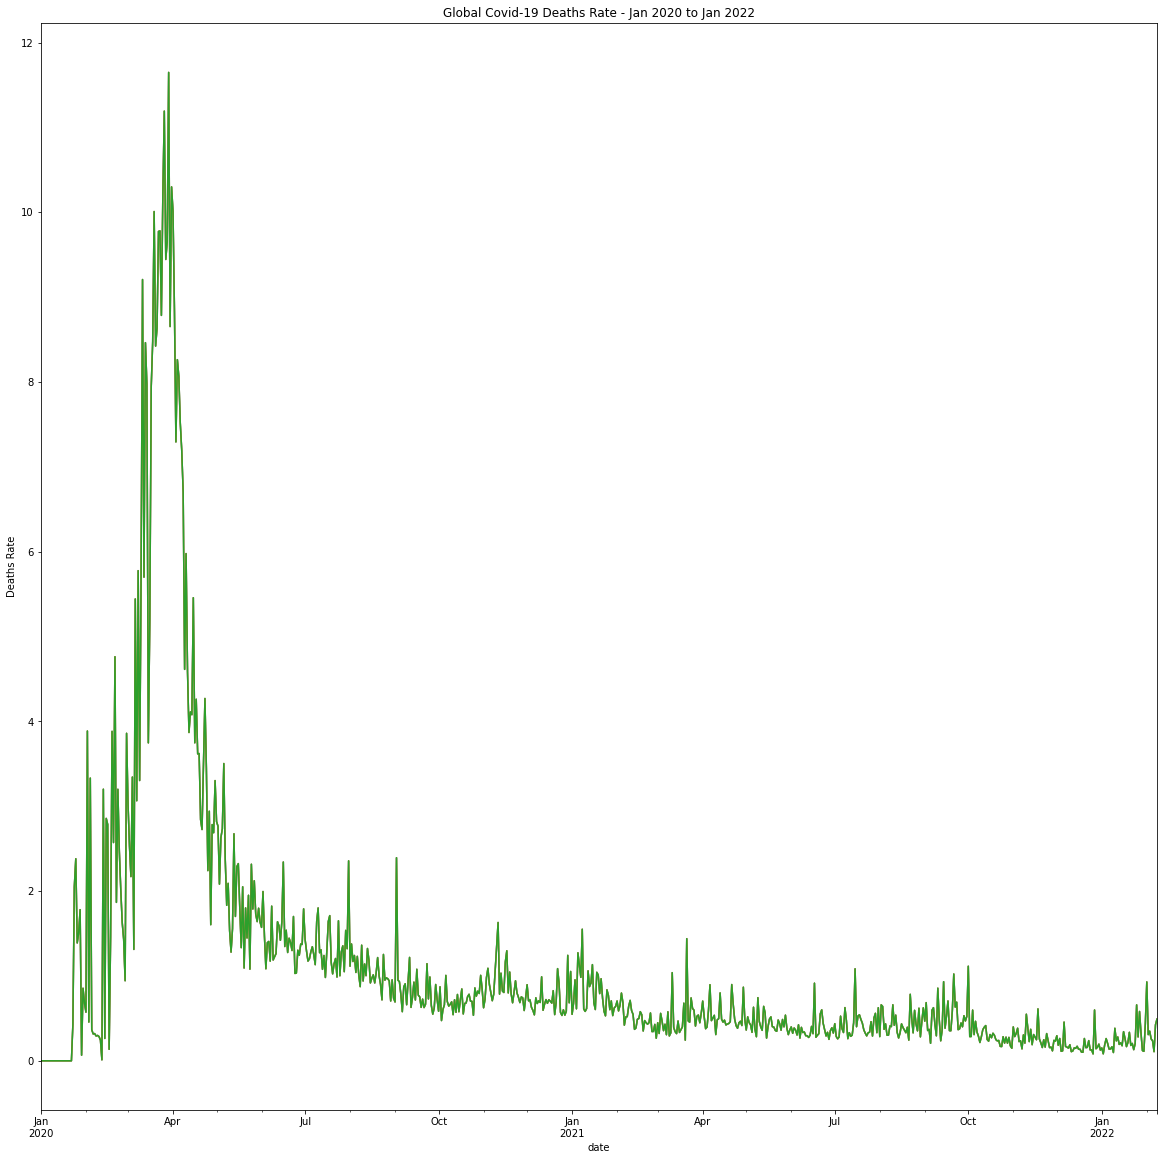

In [7]:
rate = covid.groupby(['date'])['deaths_rate'].mean()
rate.plot(figsize=(20,20))
rate.plot(ylabel="Deaths Rate")
plt.title("Global Covid-19 Deaths Rate - Jan 2020 to Jan 2022")
rate.plot.line()

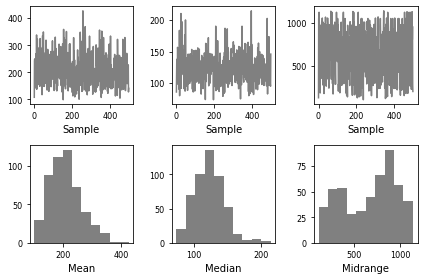

In [8]:
from pandas.plotting import bootstrap_plot
rate_finit=(covid.groupby(['date'])['deaths_rate'].sum())[np.isfinite]
bootstrap_plot(rate_finit, size=30, samples=500, color="grey");

In [9]:
covid['new_cases'] = covid['new_cases'].fillna(0)
covid['total_cases'] = covid['total_cases'].fillna(0)
cases_rate = (covid['new_cases']/covid['total_cases'])*100
covid['cases_rate']=cases_rate
covid['cases_rate'] = covid['cases_rate'].fillna(0).abs()
covid[['date','new_cases','total_cases','cases_rate']]

,date,new_cases,total_cases,cases_rate
0,2020-02-24,5.0,5.0,100.000000
1,2020-02-25,0.0,5.0,0.000000
2,2020-02-26,0.0,5.0,0.000000
3,2020-02-27,0.0,5.0,0.000000
4,2020-02-28,0.0,5.0,0.000000
...,...,...,...,...
150835,2022-02-04,0.0,230170.0,0.000000
150836,2022-02-05,232.0,230402.0,0.100694
150837,2022-02-06,0.0,230402.0,0.000000
150838,2022-02-07,0.0,230402.0,0.000000


<AxesSubplot:title={'center':'Global Covid-19 Cases Rate - Jan 2020 to Jan 2022'}, xlabel='date', ylabel='Cases Rate'>

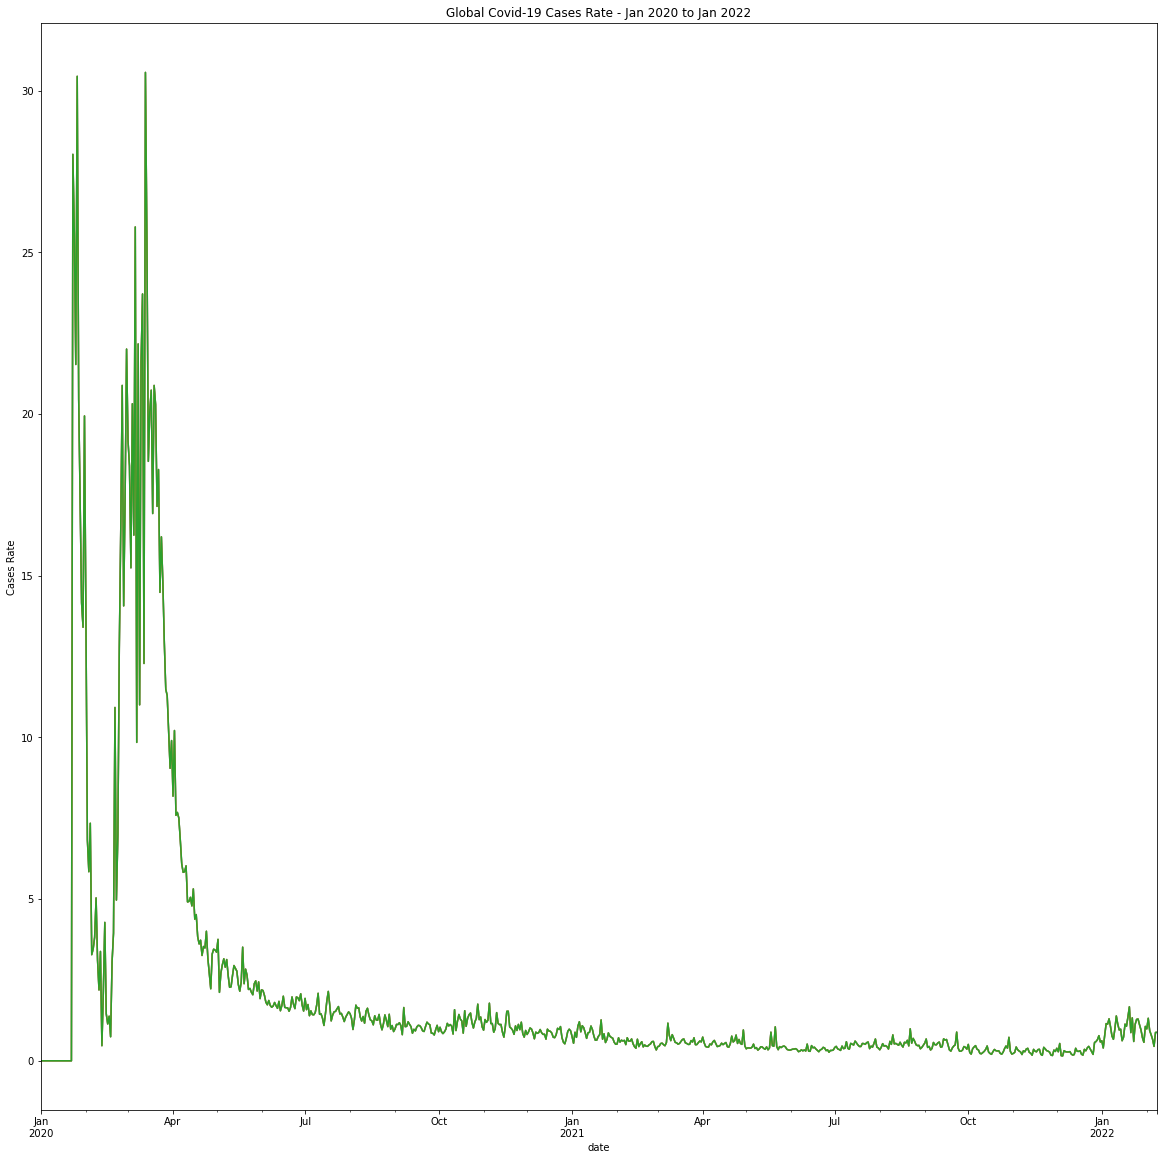

In [10]:
ratec = covid.groupby(['date'])['cases_rate'].mean()
ratec.plot(figsize=(20,20))
ratec.plot(ylabel="Cases Rate")
plt.title("Global Covid-19 Cases Rate - Jan 2020 to Jan 2022")
ratec.plot.line()

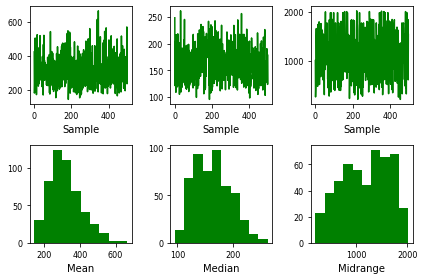

In [11]:
from pandas.plotting import bootstrap_plot
ratec_finit=(covid.groupby(['date'])['cases_rate'].sum())[np.isfinite]
bootstrap_plot(ratec_finit, size=30, samples=500, color="green");

<AxesSubplot:title={'center':'Global Covid-19 Cases Vs Deaths - Jan 2020 to Jan 2022'}, xlabel='date', ylabel='Cases Rate'>

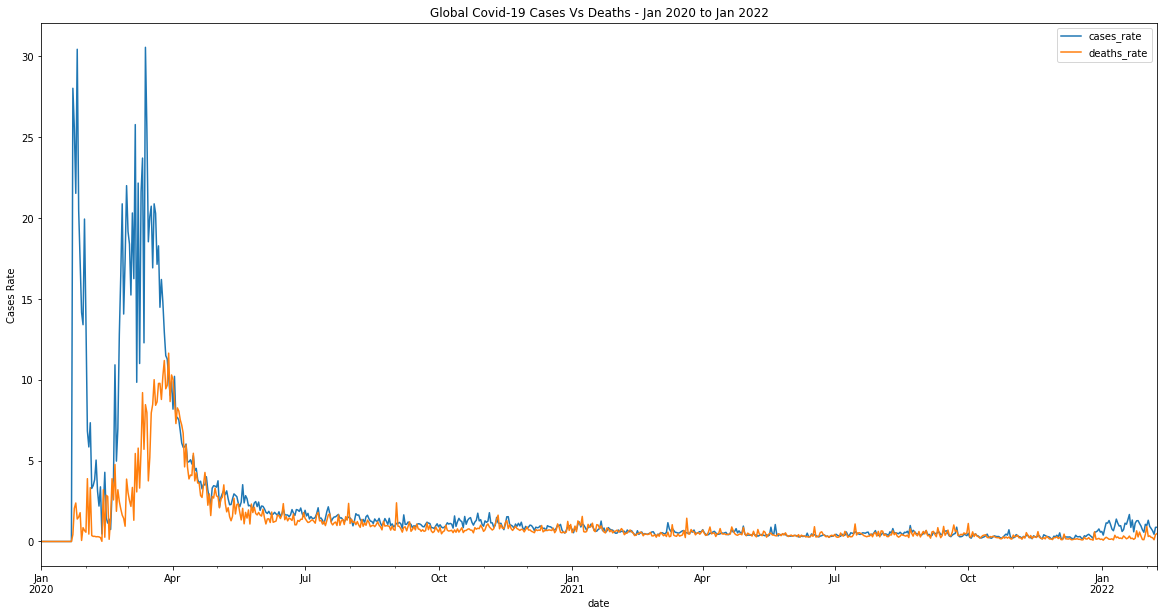

In [12]:
DC=covid.groupby(['date'])[['cases_rate','deaths_rate']].mean()
#DC.plot(ylabel="Cases Rate")
#DC.title("Global Covid-19 Cases Rate - Jan 2020 to Jan 2022")
DC.plot(figsize=(20,10),ylabel="Cases Rate",title="Global Covid-19 Cases Vs Deaths - Jan 2020 to Jan 2022")


In [13]:
covid.groupby('continent')[['total_cases','total_deaths']].max()

,total_cases,total_deaths
continent,,
Africa,3626014.0,96289.0
Asia,42410976.0,505279.0
Europe,21091589.0,329951.0
North America,77051506.0,908820.0
Oceania,2811390.0,4373.0
South America,26793497.0,634118.0


<AxesSubplot:title={'center':'Global Covid-19 by Continent - Jan 2020 to Jan 2022'}, xlabel='continent'>

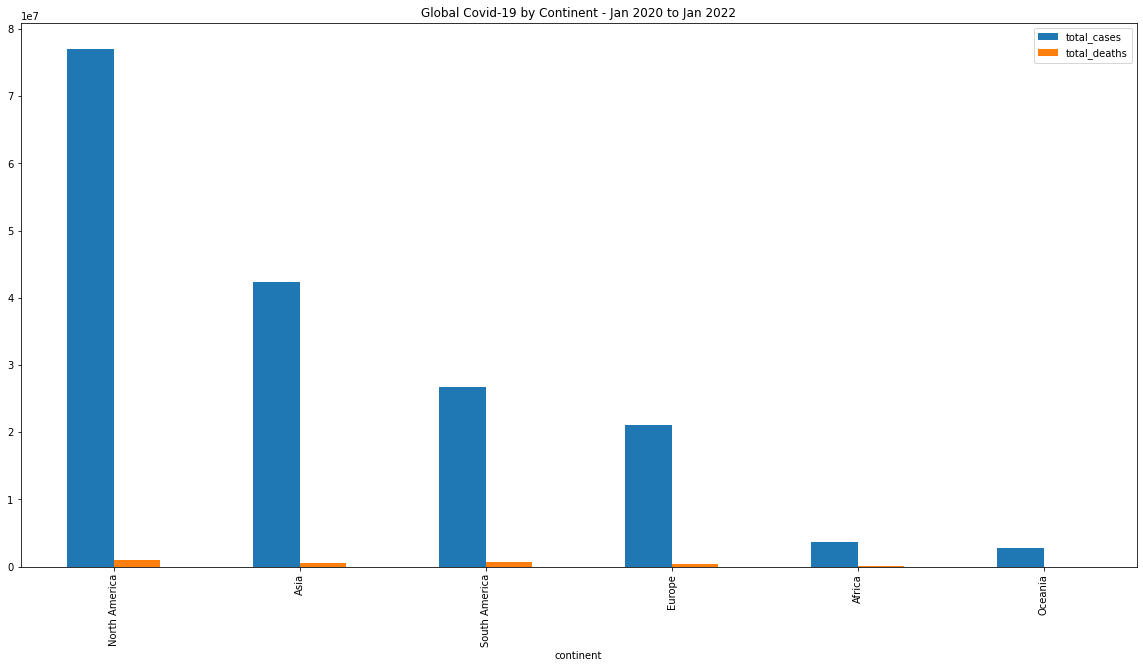

In [14]:
place=covid.groupby('continent')[['total_cases','total_deaths']].max()
place = place.sort_values(by='total_cases', ascending=False)
place.plot.bar(figsize=(20,10),title="Global Covid-19 by Continent - Jan 2020 to Jan 2022")

<AxesSubplot:title={'center':'Global Covid-19 by Country - Jan 2020 to Jan 2022'}, xlabel='location'>

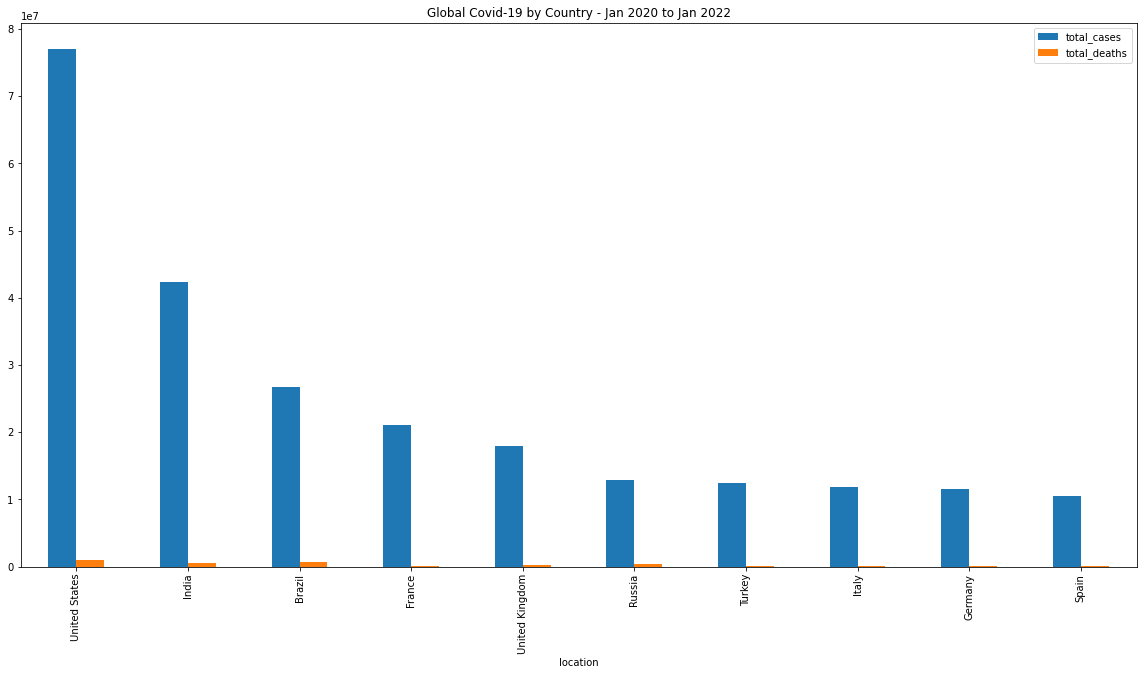

In [15]:
country=covid.groupby('location')[['total_cases','total_deaths']].max()
country = country.sort_values(by='total_cases', ascending=False)
country = country.iloc[0:10]
country.plot.bar(figsize=(20,10),title="Global Covid-19 by Country - Jan 2020 to Jan 2022")